In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import jieba.posseg as psg


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
reviews = pd.read_excel(r'D:\Crawler\51job\文本\金融.xlsx')

In [3]:
reviews.dropna(inplace=True)
reviews.drop_duplicates()
reviews.shape

(152, 1)

In [4]:
print(reviews.shape)
reviews.head()

(152, 1)


,职位描述或任职要求
1,应聘基本条件（一）坚持党的基本理论、基本路线、基本方略；自觉增强“四个意识”，坚定“四个自信...
2,应聘基本条件（一）坚持党的基本理论、基本路线、基本方略；自觉增强“四个意识”，坚定“四个自信...
3,岗位职责：1、学习跟进部门所负责项目；2、根据项目排期进行相关任务的工作安排；3、上手部门所...
4,岗位职责：1、学习跟进部门所负责项目；2、根据项目排期进行相关任务的工作安排；3、上手部门所...
5,留意此为外勤性质岗位，为正式编制人员薪资构成：基本工资+绩效工资+业绩达成奖+其他奖金+活跃...


In [5]:
content = reviews['职位描述或任职要求']

In [6]:
content

1      应聘基本条件（一）坚持党的基本理论、基本路线、基本方略；自觉增强“四个意识”，坚定“四个自信...
2      应聘基本条件（一）坚持党的基本理论、基本路线、基本方略；自觉增强“四个意识”，坚定“四个自信...
3      岗位职责：1、学习跟进部门所负责项目；2、根据项目排期进行相关任务的工作安排；3、上手部门所...
4      岗位职责：1、学习跟进部门所负责项目；2、根据项目排期进行相关任务的工作安排；3、上手部门所...
5      留意此为外勤性质岗位，为正式编制人员薪资构成：基本工资+绩效工资+业绩达成奖+其他奖金+活跃...
                             ...                        
192    职位描述：一.1、利用自身资源及能力积极拓展开发汽车金融市场，提升本公司产品的市场渗透率和占...
193    职务描述【岗位职责】1、负责对应产品的电话营销工作（具有优势的精准资源）2、负责维护和跟进意...
194    汽车金融业务经理（一）任职要求：1.中专及以上学历；2.年龄20至35周岁；3.勤奋，具备良...
196    职位描述：一.1、利用自身资源及能力积极拓展开发汽车金融市场，提升本公司产品的市场渗透率和占...
197    广州南沙明珠湾国际金融岛-横沥岛【国际金融岛湾区金融城】住宅项目，200亿超大型大盘，国际金...
Name: 职位描述或任职要求, Length: 152, dtype: object

In [7]:
strinfo = re.compile('[0-9a-zA-Z]|职位描述|岗位职责|任职要求|职位描述及要求|工作职责|岗位要求|精通|熟悉|负责|开发|工作|节假日|经验|相关|能力|福利|公司|优先')
content = content.apply(lambda x: strinfo.sub('',x))

In [8]:
worker = lambda s: [(x.word, x.flag) for x in psg.cut(s)] # 自定义简单分词函数
seg_word = content.apply(worker)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.152 seconds.
Prefix dict has been built successfully.


In [9]:
seg_word.head()

1    [(应聘, v), (基本, n), (条件, n), (（, x), (一, m), (）...
2    [(应聘, v), (基本, n), (条件, n), (（, x), (一, m), (）...
3    [(：, x), (、, x), (学习, v), (跟进, v), (部门, n), (所...
4    [(：, x), (、, x), (学习, v), (跟进, v), (部门, n), (所...
5    [(留意, v), (此, zg), (为, p), (外勤, n), (性质, n), (...
Name: 职位描述或任职要求, dtype: object

In [10]:
type(seg_word)
type(list(seg_word))

list

In [11]:
# 将词语转为数据框形式，一列是词，一列是词语所在的句子ID，最后一列是词语在该句子的位置
n_word = seg_word.apply(lambda x: len(x))  # 每一评论中词的个数

n_content = [[x+1]*y for x,y in zip(list(seg_word.index), list(n_word))]

# 将嵌套的列表展开，作为词所在评论的id
index_content = sum(list(n_content), [])
# seg_word = list(seg_word)

In [12]:
seg_word = sum(seg_word, [])
# 词性
word = [x[0] for x in seg_word]
# 词性
nature = [x[1] for x in seg_word]

# content_type = [[x]*y for x,y in zip(list(reviews['content_type']), list(n_word))]
# # 评论类型
# content_type = sum(content_type, [])

result = pd.DataFrame({"index_content":index_content,
                       "word":word,
                       "nature":nature,
                       # "content_type":content_type
                       })

In [13]:
# 删除标点符号
result = result[result['nature'] != 'x']  # x表示标点符号

# 删除停用词
stop_path = open(r"D:\DL_Homework\NLP\Data\电商产品评论数据情感分析\stoplist.txt",encoding='UTF-8')
stop = stop_path.readlines()
stop = [x.replace('\n', '') for x in stop]
word = list(set(word) - set(stop))
result = result[result['word'].isin(word)]

In [14]:
result.head()

,index_content,word,nature
0,2,应聘,v
2,2,条件,n
7,2,党的基本,l
8,2,理论,n
10,2,基本路线,n


In [15]:
# 构造各词在对应评论的位置列
n_word = list(result.groupby(by = ['index_content'])['index_content'].count())
index_word = [list(np.arange(0, y)) for y in n_word]
# 词语在该评论的位置
index_word = sum(index_word, [])
# 合并评论id
result['index_word'] = index_word

result.head()

,index_content,word,nature,index_word
0,2,应聘,v,0
2,2,条件,n,1
7,2,党的基本,l,2
8,2,理论,n,3
10,2,基本路线,n,4


In [16]:
# # 提取含有名词类的评论,即词性含有“n”的评论
# ind_n = result[['n' in x for x in result['nature']]]['index_content'].unique()
# result_n = result[[x in ind_n for x in result['index_content']]]
# result_n.head()

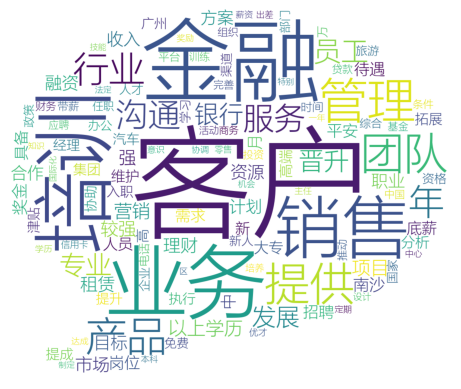

In [17]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

frequencies = result.groupby('word')['word'].count()
frequencies = frequencies.sort_values(ascending = False)
backgroud_Image=plt.imread('D:\DL_Homework\\NLP\Data\电商产品评论数据情感分析\pl.jpg')

# 自己上传中文字体到kesci
font_path = 'D:\DL_Homework\\NLP\Data\电商产品评论数据情感分析\MSYHL.TTC'
wordcloud = WordCloud(font_path=font_path, # 设置字体，不设置就会出现乱码
                      max_words=120,
                      background_color='white',
                      mask=backgroud_Image)# 词云形状

my_wordcloud = wordcloud.fit_words(frequencies)
plt.imshow(my_wordcloud)
plt.axis('off')
plt.show()